In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('parkingDataNew.csv')

# Check for NaN values
print("NaN values in the dataset:")
print(df.isna().sum())

# Step 2: Handle NaN values
# For features
imputer = SimpleImputer(strategy='mean')
df[['Garage', 'Day of the Week', 'Seconds Past Midnight']] = imputer.fit_transform(df[['Garage', 'Day of the Week', 'Seconds Past Midnight']])

# For target variable
df = df.dropna(subset=['Fullness (%)'])

NaN values in the dataset:
Garage                   0
Fullness (%)             0
Day of the Week          0
Seconds Past Midnight    0
dtype: int64


In [3]:
df['Hour'] = df['Seconds Past Midnight'] // 3600
df['Minute'] = (df['Seconds Past Midnight'] % 3600) // 60

df['Fullness_Category'] = df['Fullness (%)']

In [4]:
X = df[['Garage', 'Day of the Week', 'Hour', 'Minute']]
y = df['Fullness_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.20      0.33      0.25         3
           2       0.82      0.90      0.86        10
           3       1.00      0.80      0.89         5
           4       1.00      0.50      0.67         2
           5       0.81      0.93      0.86        27
           6       0.89      0.62      0.73        13
           7       0.73      0.73      0.73        11
           8       0.25      1.00      0.40         1
           9       1.00      0.33      0.50         3
          10       1.00      0.75      0.86         4
          11       0.00      0.00      0.00         0
          12       0.91      1.00      0.95        20
          13       1.00      0.57      0.73         7
          14       1.00      1.00      1.00         1
          15       0.67      1.00      0.80         2
          16       0.00      0.00      0.00         0
    

c:\Users\nathan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nathan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nathan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

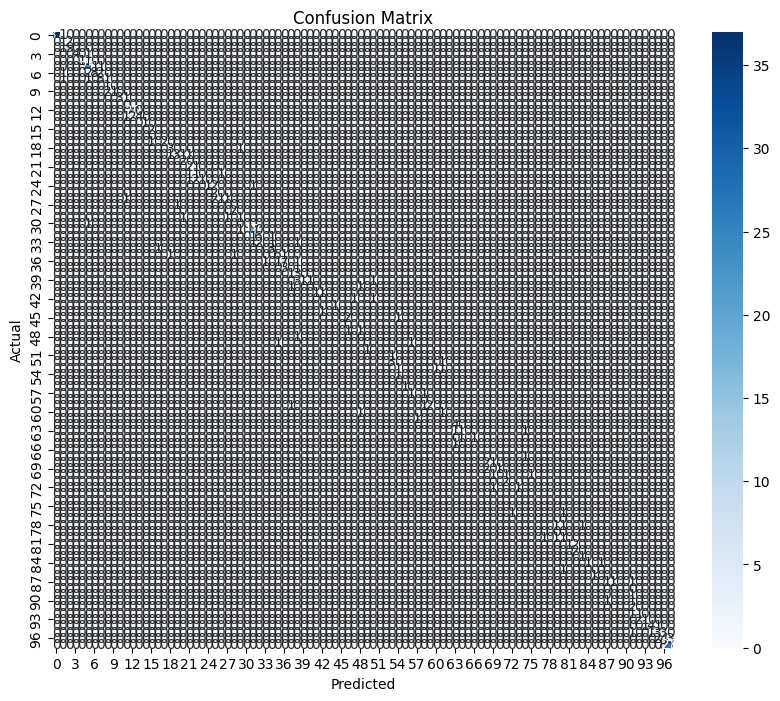

In [5]:
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

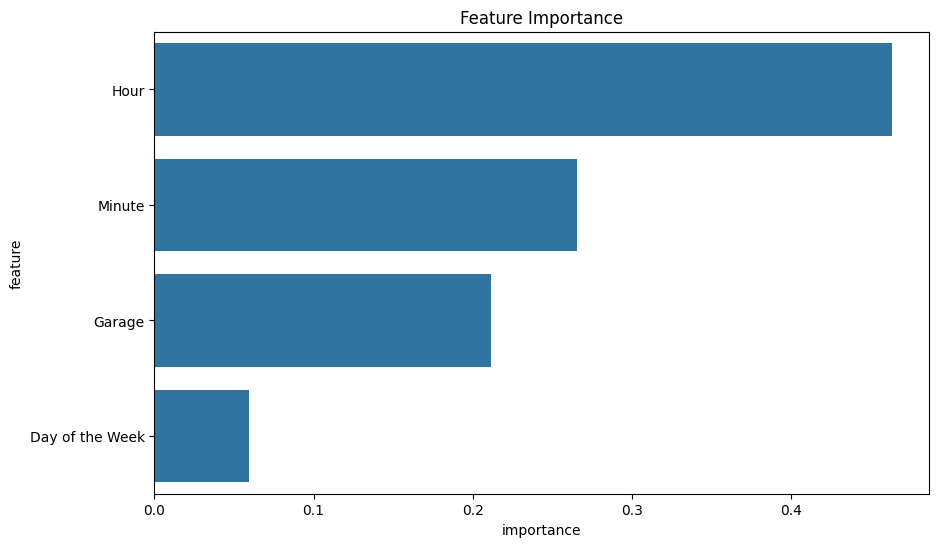

In [6]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

In [7]:
def predict_fullness_category(garage, day_of_week, hour, minute):
    input_data = np.array([[garage, day_of_week, hour, minute]])
    prediction = model.predict(input_data)
    return prediction[0]


In [8]:
example_prediction = predict_fullness_category(1, 2, 0, 43)
print(f"Predicted fullness category for Garage 1 on Tuesday at 00:43: {example_prediction}")

Predicted fullness category for Garage 1 on Tuesday at 00:43: 44


c:\Users\nathan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


c:\Users\nathan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\nathan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\nathan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\nathan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\nathan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have 

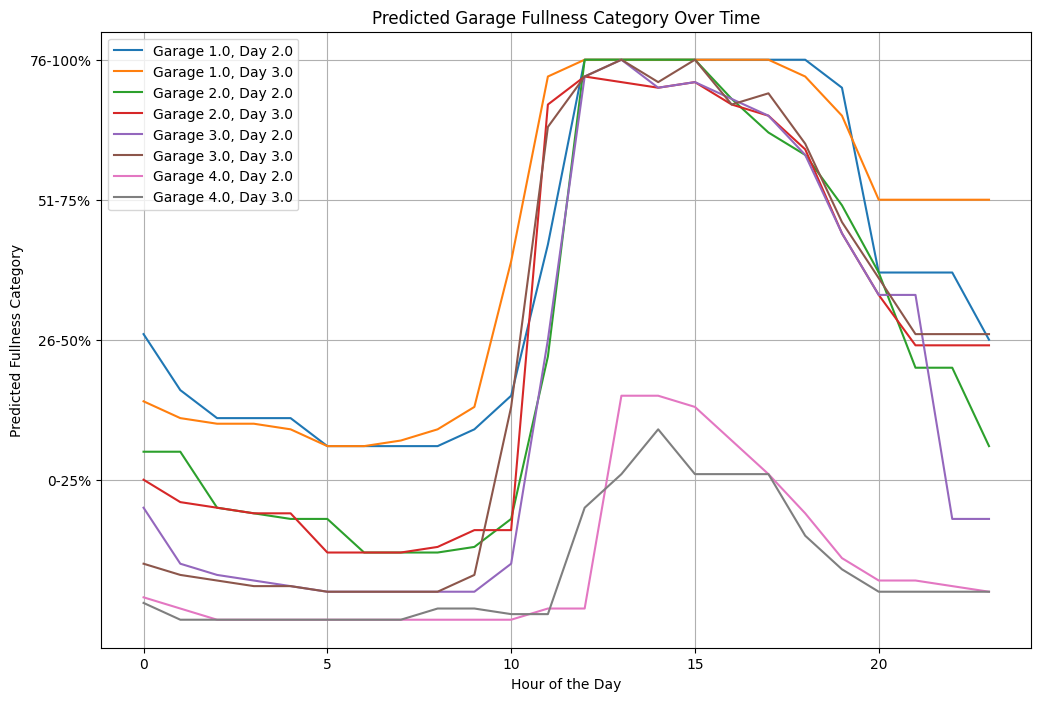

In [9]:
garages = df['Garage'].unique()
days = df['Day of the Week'].unique()

plt.figure(figsize=(12, 8))
for garage in garages:
    for day in days:
        hours = range(24)
        fullness = [predict_fullness_category(garage, day, hour, 0) for hour in hours]
        plt.plot(hours, fullness, label=f"Garage {garage}, Day {day}")

plt.xlabel('Hour of the Day')
plt.ylabel('Predicted Fullness Category')
plt.title('Predicted Garage Fullness Category Over Time')
plt.legend()
plt.grid(True)
plt.yticks([25, 50, 75, 100], ['0-25%', '26-50%', '51-75%', '76-100%'])
plt.show()